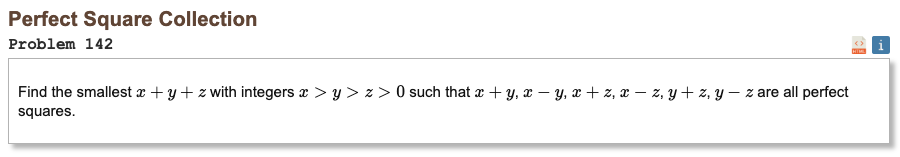

## Initial approach

* we need integers x y z where all pairwise sums and differences are squares
* write x and y using two squares a² and b² so x=(a²+b²)/2 and y=(a²−b²)/2
* do the same for x and z with another pair c² and d² sharing the same sum a²+b²=c²+d²
* this means x is a number that is a sum of two squares in at least two different ways with same parity
* for each two representations compute y and z and require x>y>z>0
* additionally check y+z and y−z are both perfect squares
* search increasing a b while caching all pairs per common sum to combine efficiently
* keep the smallest x found and stop considering larger sums once they exceed current best

In [1]:
import math

def is_square(n):
    if n < 0:
        return False
    r = math.isqrt(n)
    return r*r == n

In [2]:
def solve(limit=3500):
    best_x = None
    best_tuple = None
    sums = {}
    for a in range(2, limit):
        a2 = a*a
        for b in range(1, a):
            if ((a - b) & 1) != 0:
                continue
            b2 = b*b
            S = a2 + b2
            if S & 1:
                continue
            x = S // 2
            if best_x is not None and x >= best_x:
                continue
            y = (a2 - b2) // 2
            if S not in sums:
                sums[S] = []
            for c, d, y2 in sums[S]:
                z = (c*c - d*d) // 2
                if y > z > 0 and is_square(y + z) and is_square(y - z):
                    best_x = x
                    best_tuple = (x, y, z)
                    break
                if y2 > ((a2 - b2) // 2) > 0:
                    z2 = (a2 - b2) // 2
                    if y2 > z2 > 0 and is_square(y2 + z2) and is_square(y2 - z2):
                        best_x = x
                        best_tuple = (x, y2, z2)
                        break
            if best_x is not None and x == best_x:
                sums[S].append((a, b, y))
                continue
            sums[S].append((a, b, y))
    return best_tuple

In [3]:
%%time
x, y, z = solve()
result = x
print("Result:", result)

Result: 434657
CPU times: user 504 ms, sys: 11.4 ms, total: 515 ms
Wall time: 515 ms
